# Drone Detection Demo

This is a project to Detect Drones !

First, mount your drive to give the notebook access to your Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Next, change directory to wherever you created your folder. 

In [2]:
import os

# TODO: Change this to Drive folder location
WORKING_DIRECTORY = '/content/drive/MyDrive/Colab Notebooks/sridhar'

os.chdir(WORKING_DIRECTORY)

In [3]:
# List the contents of your working directory
# It should contain at least three folders: images, train_labels, and val_labels
!ls


'Copy of dronedetectproj.ipynb'   train.csv	 val.csv       val_labels
 images				  train_labels	 val_dataset


Now, let's install the Detecto package using pip. 

In [4]:
# Note: if it states you must restart the runtime in order to use a
# newly installed version of a package, you do NOT need to do this. 
!pip install detecto

Import everything we need in the following code block:

In [5]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

To check that everything's working, we can try reading in one of the images from our images folder. 

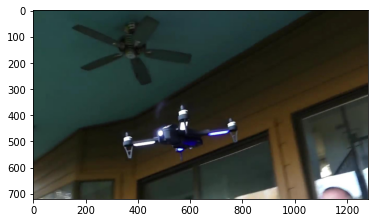

In [6]:
image = utils.read_image('images/100.jpg')
plt.imshow(image)
plt.show()

# New Section

 Now, we're ready to create our dataset and train our model. However, before doing so, it's a bit slow working with hundreds of individual XML label files, so we should convert them into a single CSV file to save time later down the line. 

Below, we create our dataset, applying a couple of transforms beforehand. These are optional, but they can be useful for augmenting your dataset without gathering more data. 


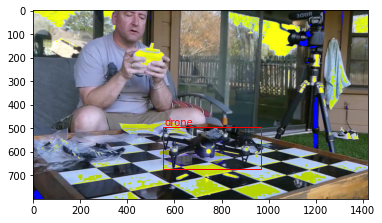

In [7]:
utils.xml_to_csv('train_labels', 'train.csv')
utils.xml_to_csv('val_labels', 'val.csv')

# Specify a list of transformations for our dataset to apply on our images
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

dataset = core.Dataset('train.csv','images/', transform=transform_img)

# dataset[i] returns a tuple containing our transformed image and
# and a dictionary containing label and box data
image, target = dataset[0]

# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Finally, let's train our model! First, we create a DataLoader over our dataset to specify how we feed the images into our model. We also use our validation dataset to track the accuracy of the model throughout training. 

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Epoch 1 of 10
Begin iterating over training dataset


  0%|          | 0/33 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 33/33 [00:55<00:00,  1.69s/it]


Begin iterating over validation dataset


100%|██████████| 29/29 [00:13<00:00,  2.21it/s]


Loss: 0.09023550358311884
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 33/33 [00:55<00:00,  1.67s/it]


Begin iterating over validation dataset


100%|██████████| 29/29 [00:12<00:00,  2.33it/s]


Loss: 0.1285576005948001
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 33/33 [00:55<00:00,  1.67s/it]


Begin iterating over validation dataset


100%|██████████| 29/29 [00:12<00:00,  2.33it/s]


Loss: 0.09881006463848312
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 33/33 [00:54<00:00,  1.66s/it]


Begin iterating over validation dataset


100%|██████████| 29/29 [00:12<00:00,  2.33it/s]


Loss: 0.08918345128667765
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 33/33 [00:54<00:00,  1.67s/it]


Begin iterating over validation dataset


100%|██████████| 29/29 [00:12<00:00,  2.33it/s]


Loss: 0.08467119251345766
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 33/33 [00:54<00:00,  1.66s/it]


Begin iterating over validation dataset


100%|██████████| 29/29 [00:12<00:00,  2.34it/s]


Loss: 0.08453402449858599
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 33/33 [00:54<00:00,  1.67s/it]


Begin iterating over validation dataset


100%|██████████| 29/29 [00:12<00:00,  2.33it/s]


Loss: 0.08373812008006819
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 33/33 [00:54<00:00,  1.67s/it]


Begin iterating over validation dataset


100%|██████████| 29/29 [00:12<00:00,  2.33it/s]


Loss: 0.08217871189117432
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 33/33 [00:54<00:00,  1.67s/it]


Begin iterating over validation dataset


100%|██████████| 29/29 [00:12<00:00,  2.33it/s]


Loss: 0.08267629788867359
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 33/33 [00:54<00:00,  1.66s/it]


Begin iterating over validation dataset


100%|██████████| 29/29 [00:12<00:00,  2.34it/s]

Loss: 0.0817700656580514


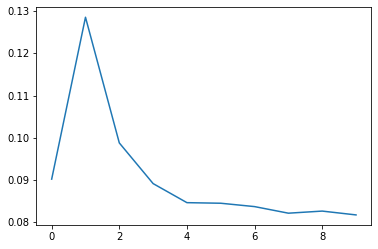

In [8]:
# Create our validation dataset
val_dataset = core.Dataset('val.csv', 'images/')

# Create the loader for our training dataset
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

# Create our model, passing in all unique classes we're predicting
# Note: make sure these match exactly with the labels in the XML/CSV files!
model = core.Model(['drone'])

# Train the model! This step can take a while
# the GPU is turned on in Edit -> Notebook settings
losses = model.fit(loader, val_dataset, epochs=10, verbose=True)

# Plot the accuracy over time
plt.plot(losses)
plt.show()

Let's see how well our model does on a couple images from our validation set:

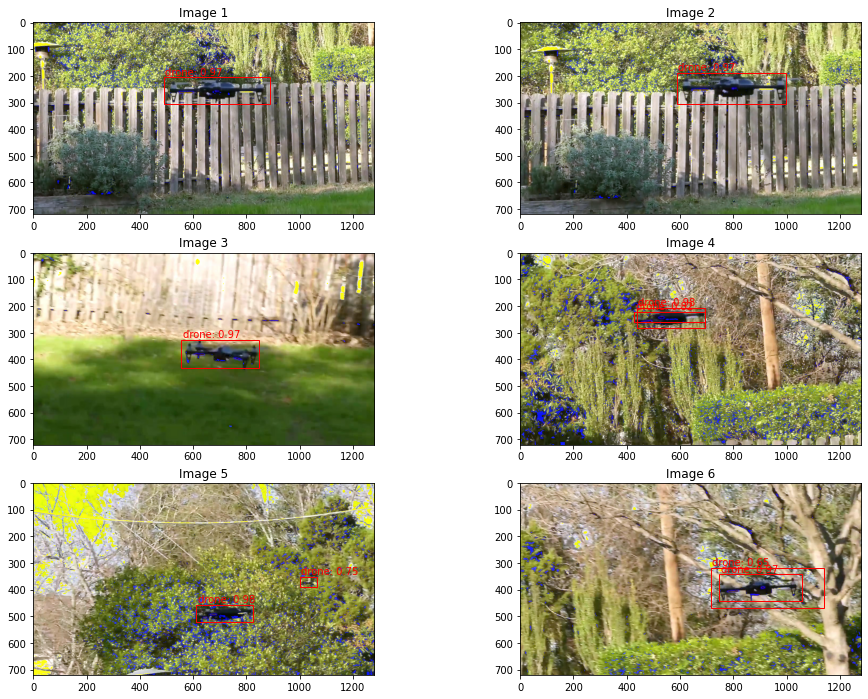

In [9]:
images = []
# Create a list of images 0, 5, 10, ... 40 from val_dataset
for i in range(0, 30, 5):
    image, _ = val_dataset[i]
    images.append(image)

# Plot a 3x3 grid of the model's predictions on our 9 images
visualize.plot_prediction_grid(model, images, dim=(3, 2), figsize=(16, 12))

# New Section

In [ ]:
from detecto.visualize import detect_live
visualize.detect_video(model, 'val_dataset/drone video.mp4', 'val_dataset/visualizecheckfile.avi')
detect_live(model, score_filter=0.7)  # Note: may not work on VMs


Overall, the model works as expected; in most of the images, it outputs high confidence values for the correct drone g shown. With a bit more fine-tuning, we could make it even better!